In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from synthetic import simulate_lorenz_96
from models.clstm import cLSTM, train_model_ista, train_model_adam

In [11]:
device = torch.device('cuda')
## data
import pandas as pd
df = pd.read_csv('C:/Users/chanyoung/Desktop/TCDF-master/data/newyork_trimed_block.csv')
df_ture = pd.read_csv('C:/Users/chanyoung/Desktop/TCDF-master/data/newyork_trimed.csv')

In [51]:
df_del = pd.read_csv('C:/Users/chanyoung/Desktop/TCDF-master/data/newyork_trimed_block2.csv')

In [52]:
df_del = df_del[:3750]

In [53]:
df_del

,275390415#7_0,-275390415#7_0,275390415#6_0,-275390415#6_0,275390415#5_0,-275390415#5_0,275390415#4_0,-275390415#5_0.1,274894285_0,276074127_0,...,221688408#7_0,5678579#6_0,-5680831#8_0,5680831#6_0,-5680831#10_0,5680831#9_0,-5680831#12_0,5680831#11_0,-5680831#14_0,5680831#13_0
0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,7.63,0.00,0.00,0.00,0.00,0.0
3,0.00,0.0,6.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,16.39,0.00,0.00,0.00,0.00,0.0
4,0.00,0.0,13.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,5.87,0.0,0.00,22.96,0.00,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,20.96,0.0,0.00,41.63,7.22,0.00,35.71,0.00,41.44,44.97,...,0.21,42.36,0.0,28.01,31.42,21.83,39.80,29.84,11.56,0.0
3746,19.76,0.0,0.00,45.94,2.51,3.50,36.59,3.50,34.85,39.36,...,0.09,45.54,0.0,32.71,25.66,26.74,35.35,26.79,12.67,0.0
3747,18.71,0.0,0.00,38.18,0.49,12.45,38.33,12.45,32.26,40.53,...,0.06,45.69,0.0,27.96,29.63,33.79,44.70,30.65,15.08,0.0
3748,25.37,0.0,0.00,37.81,0.14,0.00,36.54,0.00,37.39,42.27,...,0.02,44.29,0.0,34.82,21.01,39.05,48.08,21.37,14.52,0.0


In [54]:
df_np3 = df_del.values
X3 = torch.tensor(df_np3[np.newaxis], dtype=torch.float32, device=device)
clstm3 = cLSTM(X3.shape[-1], hidden=2).cuda(device=device)

In [55]:
train_loss_ista = train_model_ista(
    clstm3, X3, context=10,  lr=1e-2, max_iter=20000,
    check_every=50)

----------Iter = 50----------
Loss = 225.681137
Variable usage = 100.00%
----------Iter = 100----------
Loss = 183.618149
Variable usage = 100.00%
----------Iter = 150----------
Loss = 166.252853
Variable usage = 100.00%
----------Iter = 200----------
Loss = 159.078537
Variable usage = 100.00%
----------Iter = 250----------
Loss = 160.805634
Variable usage = 100.00%
----------Iter = 300----------
Loss = 165.124832
Variable usage = 100.00%
----------Iter = 350----------
Loss = 155.401703
Variable usage = 100.00%
----------Iter = 400----------
Loss = 154.074890
Variable usage = 100.00%
----------Iter = 450----------
Loss = 153.153793
Variable usage = 100.00%
----------Iter = 500----------
Loss = 148.898361
Variable usage = 100.00%
----------Iter = 550----------
Loss = 150.504486
Variable usage = 100.00%
----------Iter = 600----------
Loss = 149.075836
Variable usage = 100.00%
----------Iter = 650----------
Loss = 151.831909
Variable usage = 100.00%
----------Iter = 700----------
Loss = 1

In [4]:
df_np = df.values
X = torch.tensor(df_np[np.newaxis], dtype=torch.float32, device=device)
clstm = cLSTM(X.shape[-1], hidden=2).cuda(device=device)

In [6]:
train_loss_ista = train_model_ista(
    clstm, X, context=10,  lr=1e-2, max_iter=20000,
    check_every=50)

----------Iter = 50----------
Loss = 301.338715
Variable usage = 100.00%
----------Iter = 100----------
Loss = 217.460403
Variable usage = 100.00%
----------Iter = 150----------
Loss = 170.239532
Variable usage = 100.00%
----------Iter = 200----------
Loss = 142.063736
Variable usage = 100.00%
----------Iter = 250----------
Loss = 125.632729
Variable usage = 100.00%
----------Iter = 300----------
Loss = 121.943161
Variable usage = 100.00%
----------Iter = 350----------
Loss = 128.859695
Variable usage = 100.00%
----------Iter = 400----------
Loss = 113.488350
Variable usage = 100.00%
----------Iter = 450----------
Loss = 107.531494
Variable usage = 100.00%
----------Iter = 500----------
Loss = 103.313248
Variable usage = 100.00%
----------Iter = 550----------
Loss = 99.291122
Variable usage = 100.00%
----------Iter = 600----------
Loss = 96.536263
Variable usage = 100.00%
----------Iter = 650----------
Loss = 93.552986
Variable usage = 100.00%
----------Iter = 700----------
Loss = 91.7

Estimated variable usage = 100.00%


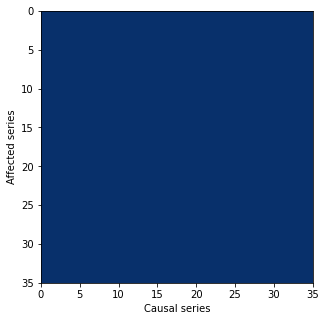

In [10]:
GC_est = clstm.GC().cpu().data.numpy()
fig, axarr = plt.subplots( figsize=(10, 5))
axarr.imshow(GC_est, cmap='Blues', vmin=0, vmax=1, extent=(0, len(GC_est), len(GC_est), 0))
axarr.set_ylabel('Affected series')
axarr.set_xlabel('Causal series')
print('Estimated variable usage = %.2f%%' % (100 * np.mean(GC_est)))

In [12]:
df_np_ture = df_ture.values
X_2 = torch.tensor(df_np_ture[np.newaxis], dtype=torch.float32, device=device)
clstm_2 = cLSTM(X_2.shape[-1], hidden=2).cuda(device=device)

In [13]:
train_loss_ista = train_model_ista(
    clstm_2, X_2, context=10,  lr=1e-2, max_iter=20000,
    check_every=50)

----------Iter = 50----------
Loss = 289.310974
Variable usage = 100.00%
----------Iter = 100----------
Loss = 201.630249
Variable usage = 100.00%
----------Iter = 150----------
Loss = 164.881348
Variable usage = 100.00%
----------Iter = 200----------
Loss = 140.890717
Variable usage = 100.00%
----------Iter = 250----------
Loss = 126.353668
Variable usage = 100.00%
----------Iter = 300----------
Loss = 116.056549
Variable usage = 100.00%
----------Iter = 350----------
Loss = 111.789108
Variable usage = 100.00%
----------Iter = 400----------
Loss = 101.158211
Variable usage = 100.00%
----------Iter = 450----------
Loss = 96.685188
Variable usage = 100.00%
----------Iter = 500----------
Loss = 93.453606
Variable usage = 100.00%
----------Iter = 550----------
Loss = 94.593102
Variable usage = 100.00%
----------Iter = 600----------
Loss = 89.989082
Variable usage = 100.00%
----------Iter = 650----------
Loss = 92.377655
Variable usage = 100.00%
----------Iter = 700----------
Loss = 84.576

0 번째 edge


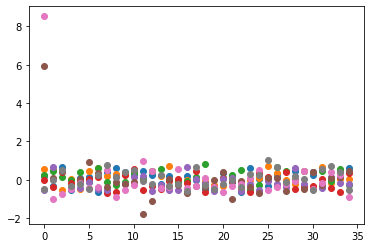

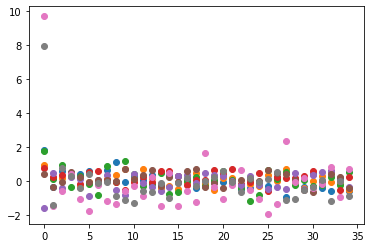

------------------------------------
1 번째 edge


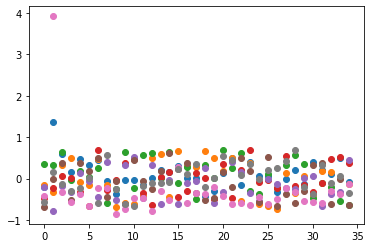

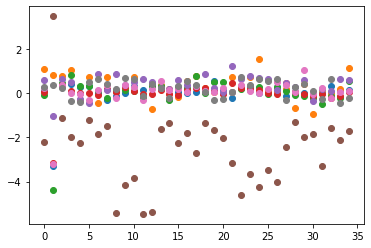

------------------------------------
2 번째 edge


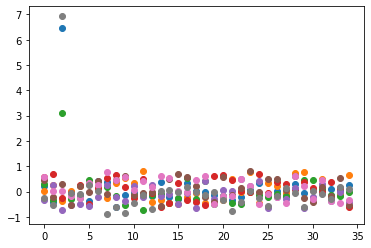

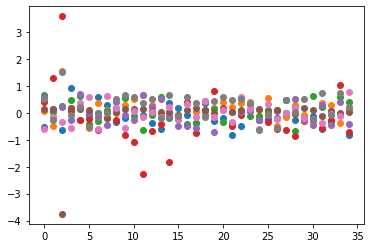

------------------------------------
3 번째 edge


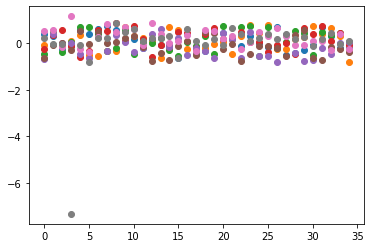

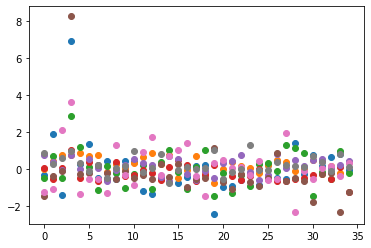

------------------------------------
4 번째 edge


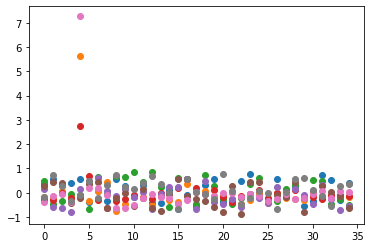

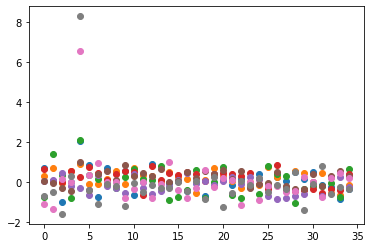

------------------------------------
5 번째 edge


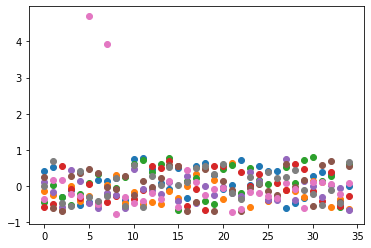

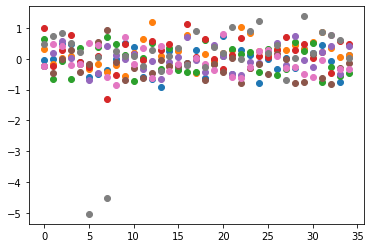

------------------------------------
6 번째 edge


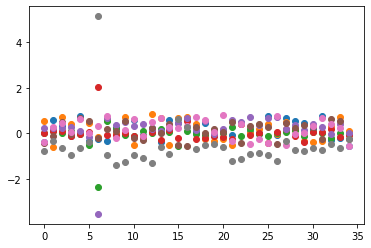

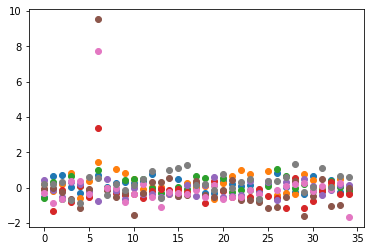

------------------------------------
7 번째 edge


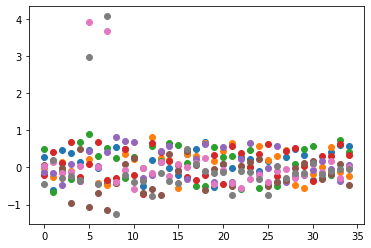

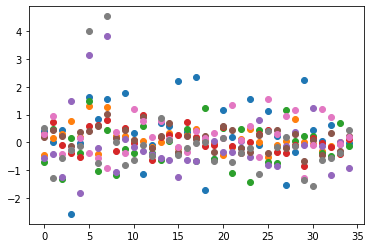

------------------------------------
8 번째 edge


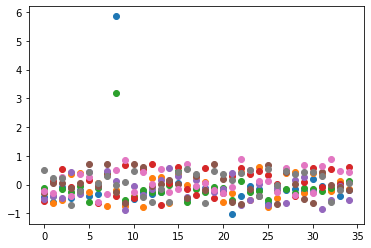

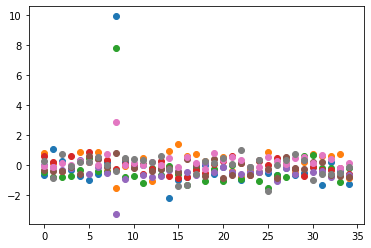

------------------------------------
9 번째 edge


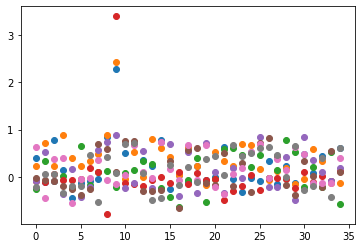

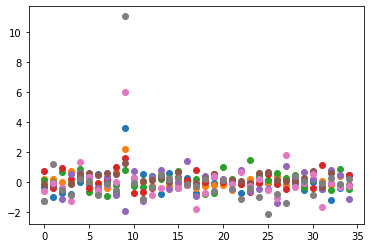

------------------------------------
10 번째 edge


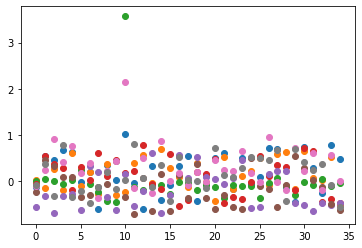

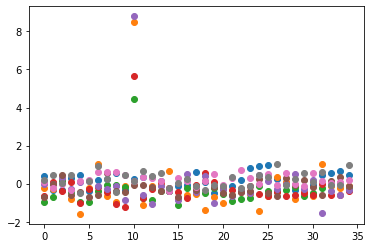

------------------------------------
11 번째 edge


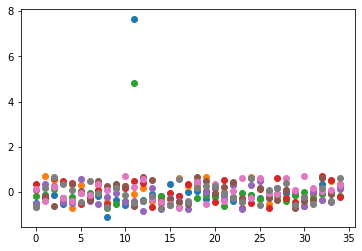

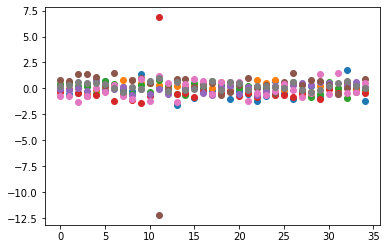

------------------------------------
12 번째 edge


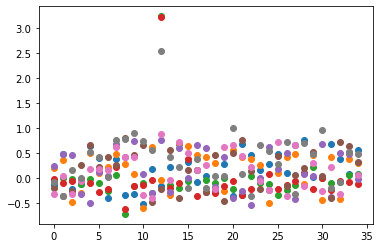

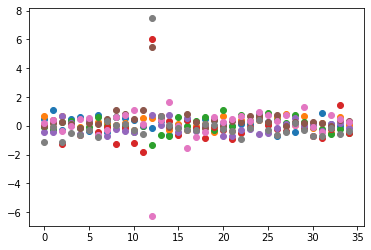

------------------------------------
13 번째 edge


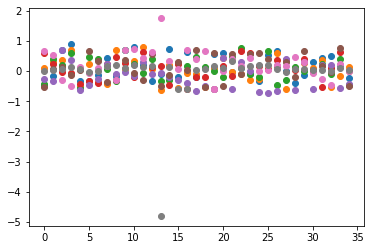

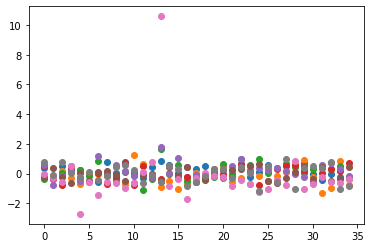

------------------------------------
14 번째 edge


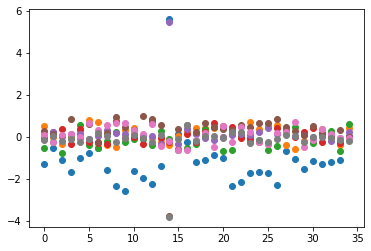

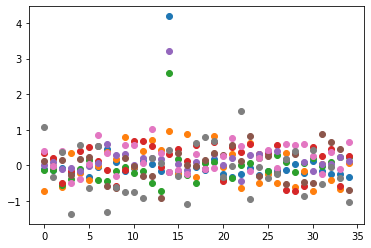

------------------------------------
15 번째 edge


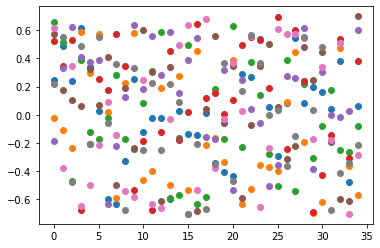

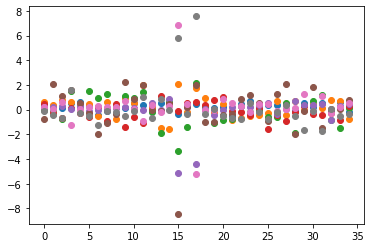

------------------------------------
16 번째 edge


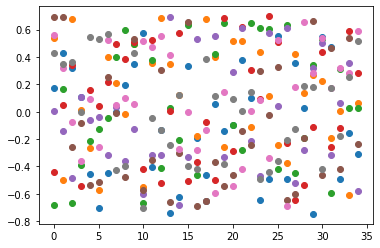

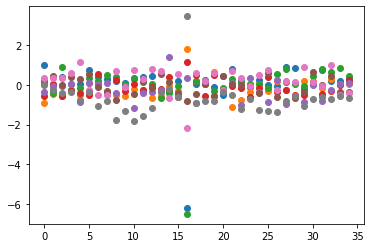

------------------------------------
17 번째 edge


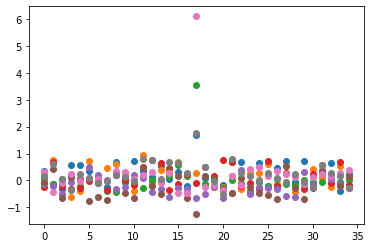

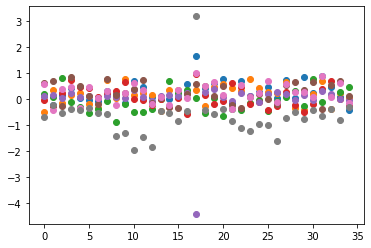

------------------------------------
18 번째 edge


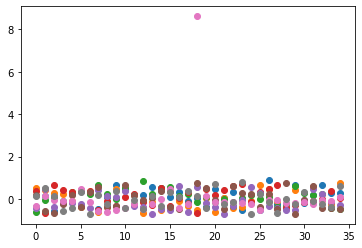

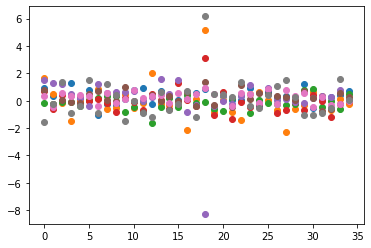

------------------------------------
19 번째 edge


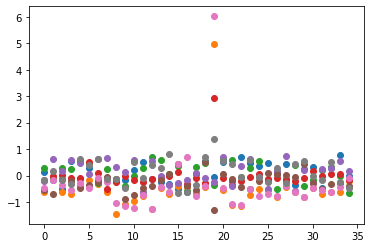

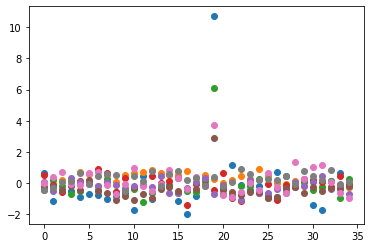

------------------------------------
20 번째 edge


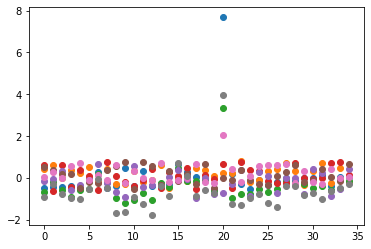

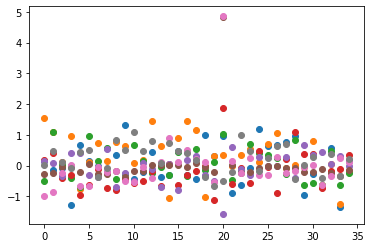

------------------------------------
21 번째 edge


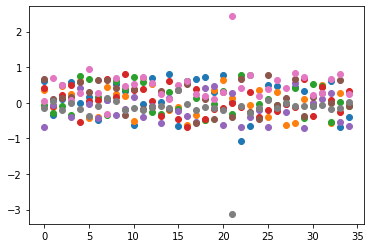

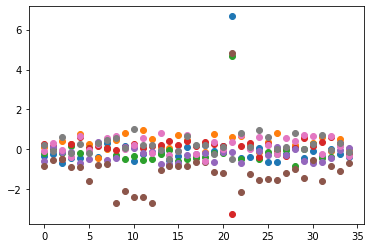

------------------------------------
22 번째 edge


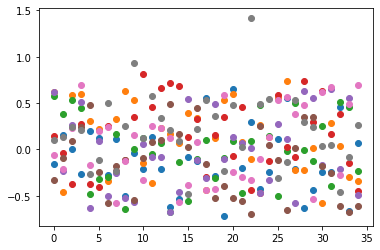

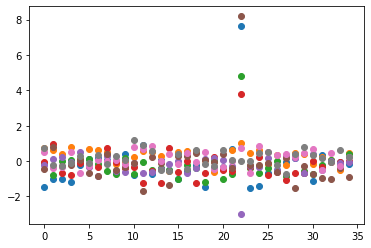

------------------------------------
23 번째 edge


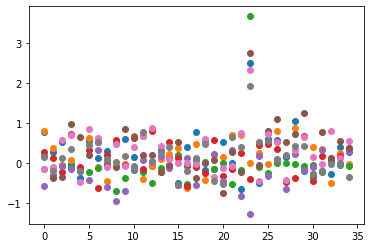

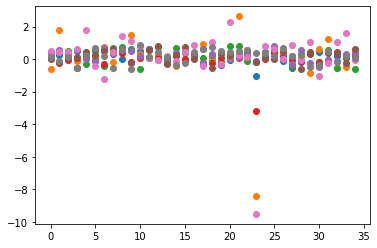

------------------------------------
24 번째 edge


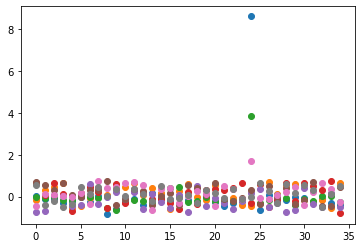

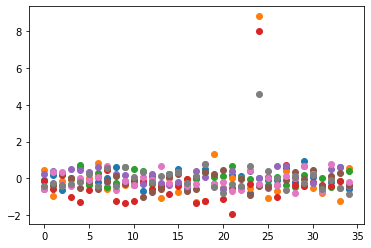

------------------------------------
25 번째 edge


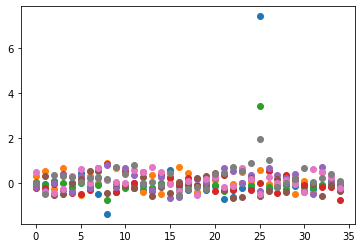

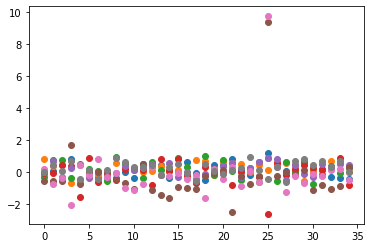

------------------------------------
26 번째 edge


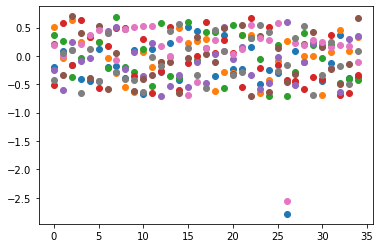

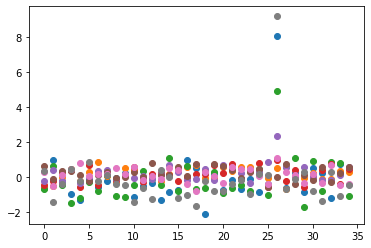

------------------------------------
27 번째 edge


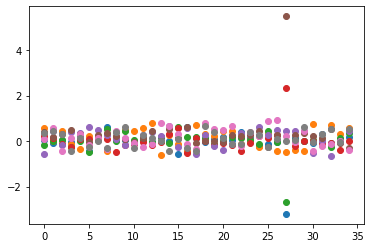

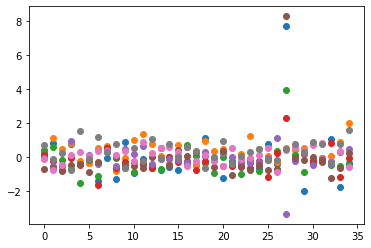

------------------------------------
28 번째 edge


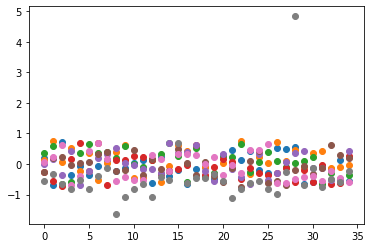

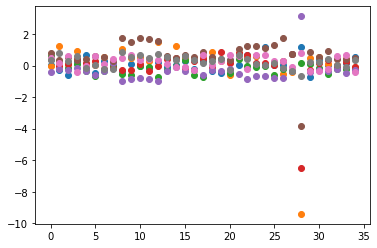

------------------------------------
29 번째 edge


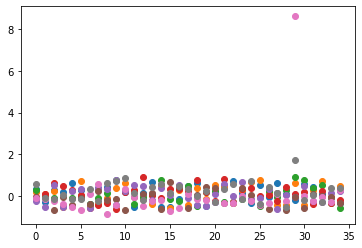

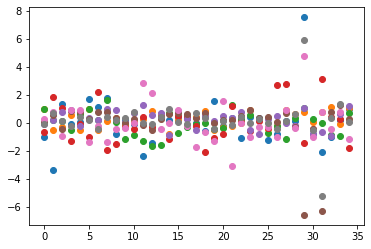

------------------------------------
30 번째 edge


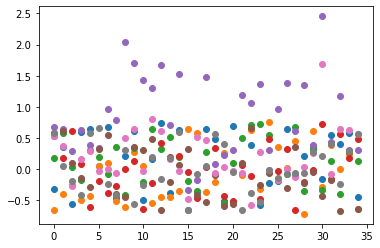

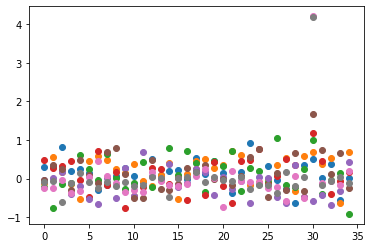

------------------------------------
31 번째 edge


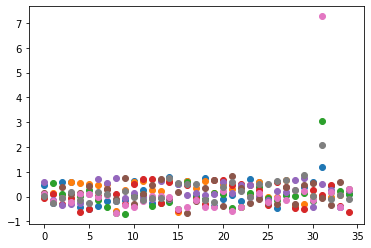

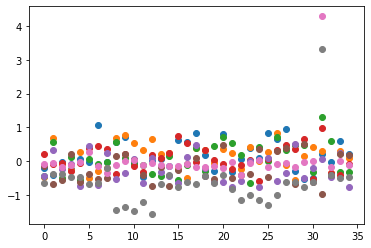

------------------------------------
32 번째 edge


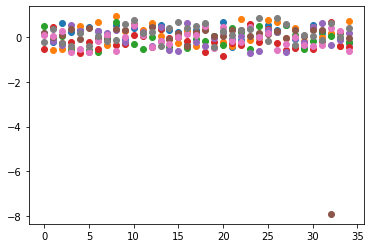

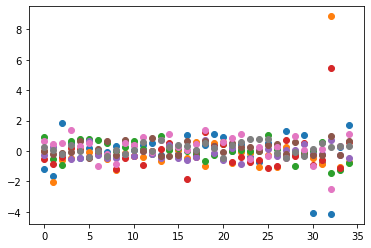

------------------------------------
33 번째 edge


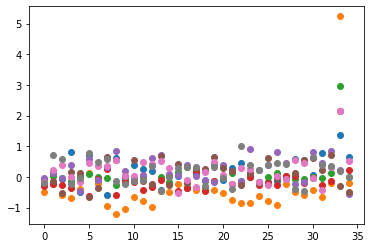

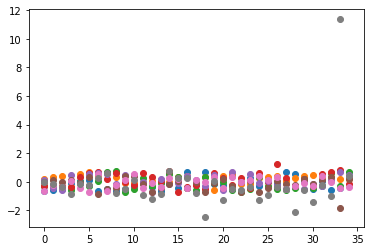

------------------------------------
34 번째 edge


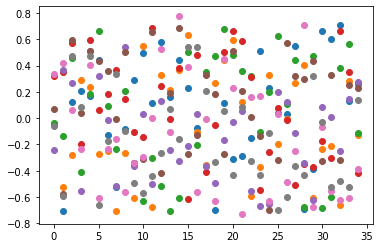

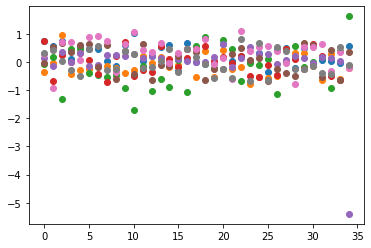

------------------------------------


In [56]:
for i in range(X.shape[-1]):
    print(i, "번째 edge")
    clstm3.weight_causality(i)
    clstm.weight_causality(i)
    print('------------------------------------')

In [37]:
df.columns[1]

'-275390415#7_0'

In [58]:
df.columns[15]

'-274886548#0_0'

In [67]:
df.columns[34]

'5680831#13_0'